In [1]:
import pandas as pd
import numpy as np
import verispy, os
from verispy import VERIS
import seaborn as sns
from util import constants
import matplotlib.pyplot as plt
import sklearn as sk
import dowhy

[Source for VERISPY + Useful README](https://github.com/RiskLens/verispy)

In [2]:
DATA_DIR ="./data/validated"
v = VERIS(json_dir=DATA_DIR)

Found 8363 json files.


##### v is a VERIS object. vdf contains the actual data. 

In [3]:
# v.infer_objects().dtypes
vdf = v.json_to_df()

Loading schema


 32%|███▏      | 2658/8363 [00:00<00:00, 17658.24it/s]

Loading JSON files to DataFrame.


  0%|          | 0/173 [00:00<?, ?it/s]

Finished loading JSON files to dataframe.
Building DataFrame with enumerations.
Building enumeration columns.


100%|██████████| 173/173 [00:06<00:00, 25.03it/s]


Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)
Finished building VERIS DataFrame


            enum     x      n     freq
0  Insignificant    74  152.0  0.48684
1    Distracting    35  152.0  0.23026
2       Damaging    23  152.0  0.15132
3        Painful    19  152.0  0.12500
4   Catastrophic     1  152.0  0.00658
5        Unknown  5767    NaN      NaN
count    4.711000e+03
mean     5.356575e+06
std      1.778919e+08
min      1.000000e+00
25%      1.200000e+01
50%      9.500000e+02
75%      9.000000e+03
max      1.200000e+10
Name: records_lost, dtype: float64


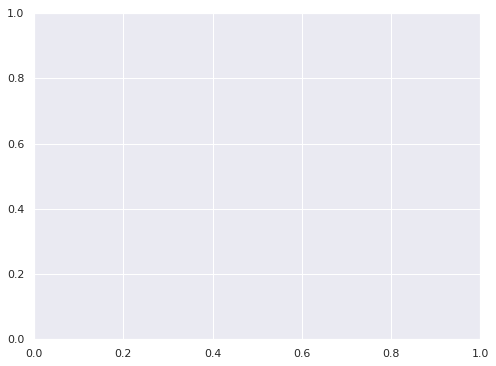

In [60]:
v.enumerations
print(v.enum_summary(vdf, 'impact.overall_rating'))
f, ax = plt.subplots(figsize=(8, 6), sharex=True)
print(vdf['records_lost'].describe())
vdf['victim.industry.name']
vdf_loss['victim.industry.name']
sns.set_style("darkgrid")
sns.set(font_scale=1)
# rtg_df = v.enum_summary(vdf, 'impact.overall_rating', use_unk=True)
# rtg_df
# rtg_df['Percent'] = rtg_df['freq'] * 100
# rtg_df
# ax = sns.distplot(rtg_df, 'enum', 'x')

bool       2110
object      147
float64      91
int64         1
dtype: int64


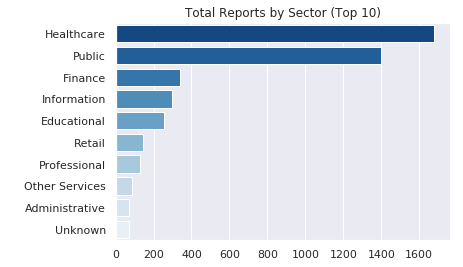

In [61]:
# sns.barplot(x=rtg_df['enum'], y=rtg_df['Percent'])
# # plt.yscale('symlog')

# # sns.barplot()
data=vdf_loss.groupby('victim.industry.name')
print(data)
ax1 = sns.countplot(y = 'victim.industry.name', data=vdf_loss, orient='h',
                   saturation=.8, palette="Blues_r", order=vdf_loss['victim.industry.name'].value_counts().iloc[:10].index)
# ax2 = sns.count_plot

plt.title('Total Reports by Sector (Top 10)')
plt.xlabel('')
# plt.xscale('log')

plt.ylabel(' ')
plt.savefig('reports.svg')
# ax.show()
# v.enum_summary(vdf, 'impact.')
print(vdf.dtypes.value_counts())
# v.load_schema().value_counts.
a= pd.io.json.json_normalize(v.vschema)

# pd.io.json.dumps(v.vschema, encode_html_chars=True)
# # df =sk.preprocessing.OneHotEncoder(a)
# a = a.loc[:,a.columns.str.contains('required')]
# b = a['required']
# v.nonenum_vars

In [62]:

# print(b[0])
# print(a[0:10])
# A= vdf.replace({"Unknown": np.nan, "NA":np.nan}, value=None)
# print(A.notna().sum().sum())
# print(A.isna().sum().sum())
# print(A.notna().sum().sum())
# (vdf.to_numpy(dtype=bool) & A.to_numpy(dtype=bool)).sum().sum()

# vdf.notna()
# def fun(x):
#     a = x.split('.')
#     print(list(filter(lambda el: el != 'properties', a)))
# list(map(fun, list(a.columns)))
# # a.rename(mapper=fun)

In [63]:

vdf.rename(columns={'attribute.confidentiality.data_total': 'records_lost'}, inplace=True)
vdf['action.Bugs'] = vdf['action.Hacking'] | vdf['action.Malware']
vdf['is_loss'] = vdf['records_lost'].isna()
print(vdf['is_loss'])
# sns.catplot(y='records_lost', data=vdf, kind="violin")

# adf=pd.Series()

vdf_loss = vdf.dropna(subset=["records_lost"])
df_loss_stat = vdf_loss[{'victim.industry.name', 'records_lost'}].groupby('victim.industry.name').describe().astype('int64')

vdf_loss['records_lost']
df_loss_stat

# print(v.enum_summary(vdf_loss, 'records_lost')
# sns.catplot(y=vdf_loss['records_lost'], orient="h", kind="violin")

0        True
1        True
2       False
3        True
4        True
        ...  
8358     True
8359     True
8360    False
8361     True
8362    False
Name: is_loss, Length: 8363, dtype: bool


records_lost                                           \
                            count      mean        std  min    25%     50%   
victim.industry.name                                                         
Accommodation                  48   8067460   55269176    1     30     200   
Administrative                 72   8455570   32662688    1    842   17347   
Agriculture                     2       362        478   24    193     362   
Construction                    7    463347     994431    1    464    5500   
Educational                   256     55015     238475    1    211    1403   
Entertainment                  27   4394750   20723012    1     29    6000   
Finance                       340   2462545   13218627    1    463    3000   
Healthcare                   1680    104980    1711885    1    260    1300   
Information                   295  64523769  706089862    1   4278  600000   
Management                      7   6707295   17326952    4  80450  159000   
Manufacturing                  67    736067    2396508    1    161    4610   
Mining                          2      1150       1202  300    725    1150   
Other Services                 84   1960703    7924843    1     95    1650   
Professional                  129  13468836   76005323    1    557    3550   
Public                       1399    391492    4088054    1      1       3   
Real Estate                    12      1773       2914    2     63     656   
Retail                        143   4359011   19592587    1     72    1600   
Trade                          27    412399    1159577   60   1083    5200   
Transportation                 32   2746410   10344757    1    163    6600   
Unknown                        71  11043362   54839276    1    425    4395   
Utilities                      11    186498     536860    1    111    5100   

                                            
                          75%          max  
victim.industry.name                        
Accommodation            7296    383000000  
Administrative        1325000    200000000  
Agriculture               531          700  
Construction           268500      2700000  
Educational              8350      2490000  
Entertainment          400000    108000000  
Finance                 90608    134000000  
Healthcare               5426     50000000  
Information           8000000  12000000000  
Management             315580     46000000  
Manufacturing           45000     12367232  
Mining                   1575         2000  
Other Services          21250     42600000  
Professional           400000    808539849  
Public                    652    100000000  
Real Estate              1760        10000  
Retail                  61313    145000000  
Trade                   42000      4833678  
Transportation         812500     57000000  
Unknown                 86053    419000000  
Utilities               63850      1800000

Total Records Breached, Log Normalized

count    4.711000e+03
mean     5.356575e+06
std      1.778919e+08
min      1.000000e+00
25%      1.200000e+01
50%      9.500000e+02
75%      9.000000e+03
max      1.200000e+10
Name: records_lost, dtype: float64



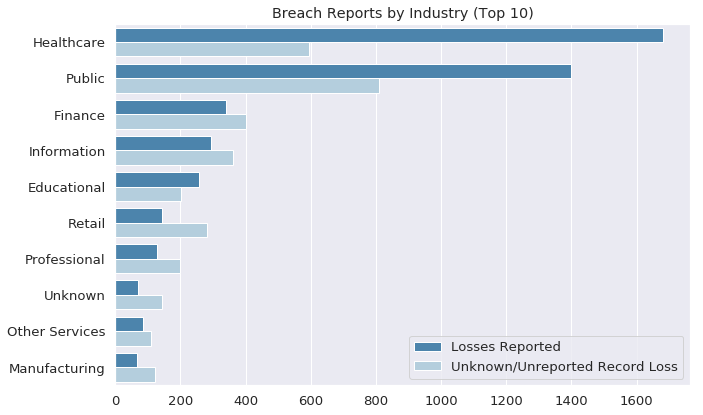

In [79]:
# for a in cst.ACTIONS:
#     adf[a] = vdf_loss[vdf_loss[a]==True]
    
# adf['action.Environmental']
# adf['action.Hacking']['records_lost']
# # plt.hist(adf['action.Hacking']['records_lost'])
# plt.setscale("log")
# print(adf[cst.ACTIONS])
# sns.distplot(adf[cst.ACTIONS]['records_lost'])?

f, ax = plt.subplots(figsize=(10, 6), sharex=True)
print(vdf['records_lost'].describe())
vdf['victim.industry.name']
vdf_loss['victim.industry.name']
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

ax = sns.countplot(y = vdf['victim.industry.name'], orient='h', saturation=.7, palette="Blues_r", 
                   hue=vdf['is_loss'], order=vdf['victim.industry.name'].value_counts().iloc[:10].index)
# ax1 = sns.countplot(y = 'victim.industry.name', data=vdf_loss, orient='h',
#                    saturation=.8, palette="Reds_r", order=vdf_loss['victim.industry.name'].value_counts().index)
# ax2 = sns.count_plot

plt.title('Breach Reports by Industry (Top 10)')
plt.xlabel('')
# plt.xscale('log', basex=10)
plt.ylabel('', labelpad=1)
# sns.set_legend(label=[])
plt.legend(labels=["Losses Reported", "Unknown/Unreported Record Loss"])
# ax1.plot(label='small')
plt.tight_layout()
plt.savefig('ex.svg', format="svg", orient="landscape")
vdf_final = vdf_loss.copy()
print()

In [9]:

# def assign_bugs(row):
#     return row.loc['action.Malware'] | row['action.Hacking']
# vdf_final[{'action.Malware', 'action.Hacking'}]
# vdf_final.assign('action.Bugs' = lambda x: x['action.Hacking'] | x['action.Bugs'])
# vdf_final[vdf[{'action.Hacking', 'action.Malware'}]==True].index
# vdf_final
vdf
# vdf['impact.loss.rating.Major']
# vdf[vdf.t

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.revenue.iso_currency_code.ZAR,victim.revenue.iso_currency_code.ZMK,victim.revenue.iso_currency_code.ZWD,victim.secondary.amount,victim.secondary.notes,victim.secondary.victim_id,victim.state,victim.victim_id,action.Bugs,is_loss
0,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,1.0,NaN,[Proliance Surgeons],WA,Orthopedic Physician Associates,False,True
1,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,NaN,Tumblr,False,True
2,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,NaN,UA Customs Service,True,False
3,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,NY,Langston Hughes Young Explorers Academy,False,True
4,False,False,False,False,True,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,NaN,Limburg Police Department,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8358,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,US-KY,British Petroleum,False,True
8359,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,NaN,Bank of Montreal,True,True
8360,False,False,False,False,True,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,NaN,Peterborough Regional Health Centre,False,False
8361,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,NaN,NaN,NaN,NaN,Department of National Defence,True,True


In [10]:
# vdf_final['action.']

In [11]:
import logging
# import dowhy
# import pygraphviz
import dowhy.datasets, dowhy.plotter
try:
    from dowhy import CausalModel
except:
    print('Using DoWhy 0.1.1')
    from dowhy.do_why import CausalModel

In [12]:
import sys
print(sys.version)

3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 22:33:48) 
[GCC 7.3.0]


In [13]:
# Create causal model with instrumental
print(vdf_final['records_lost'])

model = CausalModel(
    data = vdf_final,
    treatment = 'action.Bugs',
    outcome = 'records_lost',
    common_causes = ['action.Environmental', 'action.Error', 'action.Misuse', 'action.Physical', 'action.Social'],
    instruments = ['action.Hacking', 'action.Malware'],
    proceed_when_unidentifiable=True
)
model.view_model(layout="dot")

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['action.Bugs'] on outcome ['records_lost']


2         64.0
5          1.0
7          1.0
8          3.0
9         41.0
         ...  
8353      47.0
8356     300.0
8357    9300.0
8360     280.0
8362       1.0
Name: records_lost, Length: 4711, dtype: float64


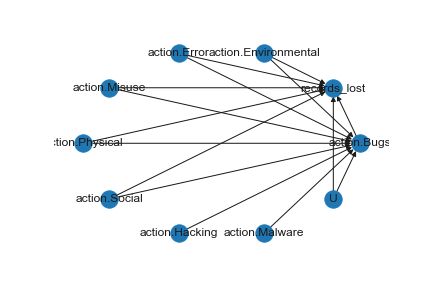

In [14]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

We get a causal graph. Now identification and estimation is done. 

In [15]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['action.Misuse', 'action.Environmental', 'action.Physical', 'action.Social', 'action.Error', 'U']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['action.Hacking', 'action.Malware']


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(records_lost|action.Misuse,action.Environmental,act
d[action.Bugs]                                                                

                                         
ion.Physical,action.Social,action.Error))
                                         
Estimand assumption 1, Unconfoundedness: If U→{action.Bugs} and U→records_lost then P(records_lost|action.Bugs,action.Misuse,action.Environmental,action.Physical,action.Social,action.Error,U) = P(records_lost|action.Bugs,action.Misuse,action.Environmental,action.Physical,action.Social,action.Error)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(records_lost, [action.Hacking, action.Malware])*Derivat
ive([action.Bugs], [action.Hacking, action.Malware])**(-1))
Estimand assumption 1, As-if-random: If U→→rec

In [16]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression" )
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: records_lost~action.Bugs+action.Misuse+action.Environmental+action.Physical+action.Social+action.Error


Causal Estimate is 23069960.93087865


In [17]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['action.Misuse', 'action.Environmental', 'action.Physical', 'action.Social', 'action.Error', 'U']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['action.Hacking', 'action.Malware']


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(records_lost|action.Misuse,action.Environmental,act
d[action.Bugs]                                                                

                                         
ion.Physical,action.Social,action.Error))
                                         
Estimand assumption 1, Unconfoundedness: If U→{action.Bugs} and U→records_lost then P(records_lost|action.Bugs,action.Misuse,action.Environmental,action.Physical,action.Social,action.Error,U) = P(records_lost|action.Bugs,action.Misuse,action.Environmental,action.Physical,action.Social,action.Error)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(records_lost, [action.Hacking, action.Malware])*Derivat
ive([action.Bugs], [action.Hacking, action.Malware])**(-1))
Estimand assumption 1, As-if-random: If U→→rec

## Method 1: Stratification

In [18]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))
res_random = model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause",test_significance=True)

res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")

res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.8)

print(res_subset)
print(res_placebo)
print(res_subset)
# model.refute_estimate(identified_estimand, causal_estimate)
# res_random  = model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: records_lost~action.Bugs+action.Misuse+action.Environmental+action.Physical+action.Social+action.Error
/home/jakes/anaconda3/envs/cb/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jakes/anaconda3/envs/cb/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: records_lost~action.Bugs+action.Misuse+action.Environmental+action.Physical+action.Social+action.Error+w_random
/home/jakes/anaconda3/envs/cb/lib/python3.7/site-packages/

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(records_lost|action.Misuse,action.Environmental,act
d[action.Bugs]                                                                

                                         
ion.Physical,action.Social,action.Error))
                                         
Estimand assumption 1, Unconfoundedness: If U→{action.Bugs} and U→records_lost then P(records_lost|action.Bugs,action.Misuse,action.Environmental,action.Physical,action.Social,action.Error,U) = P(records_lost|action.Bugs,action.Misuse,action.Environmental,action.Physical,action.Social,action.Error)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(records_lost, [action.Hacking, action.Malware])*Derivat
ive([action.Bugs], [action.Hacking, action.Malware])**(-1))
Es

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: records_lost~placebo+action.Misuse+action.Environmental+action.Physical+action.Social+action.Error
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: records_lost~action.Bugs+action.Misuse+action.Environmental+action.Physical+action.Social+action.Error


Refute: Use a subset of data
Estimated effect:(23069960.93087865,)
New effect:(29621726.299175832,)

Refute: Use a Placebo Treatment
Estimated effect:(23069960.93087865,)
New effect:(12697859.700878007,)

Refute: Use a subset of data
Estimated effect:(23069960.93087865,)
New effect:(29621726.299175832,)



## Method 2: Matching

In [19]:
causal_estimate_match = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: records_lost~action.Bugs+action.Misuse+action.Environmental+action.Physical+action.Social+action.Error
/home/jakes/anaconda3/envs/cb/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jakes/anaconda3/envs/cb/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:62: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/home/jakes/anaconda3/envs/cb/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:77: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = trea

*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(records_lost|action.Misuse,action.Environmental,act
d[action.Bugs]                                                                

                                         
ion.Physical,action.Social,action.Error))
                                         
Estimand assumption 1, Unconfoundedness: If U→{action.Bugs} and U→records_lost then P(records_lost|action.Bugs,action.Misuse,action.Environmental,action.Physical,action.Social,action.Error,U) = P(records_lost|action.Bugs,action.Misuse,action.Environmental,action.Physical,action.Social,action.Error)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(records_lost, [action.Hacking, action.Malware])*Derivat
ive([action.Bugs], [action.Hacking, action.Malware])**(-1))
Es

In [20]:
res_random = model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause",test_significance=True)

res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")

res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.8)
model.view_model()
s
print(res_random)
print(res_placebo)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: records_lost~action.Bugs+action.Misuse+action.Environmental+action.Physical+action.Social+action.Error+w_random
/home/jakes/anaconda3/envs/cb/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jakes/anaconda3/envs/cb/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: records_lost~placebo+action.Misuse+action.Environmental+action.Physical+action.Social+action.Error
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dow

NameError: name 's' is not defined